# Bike Sharing App


###### import libraries, dataset and start looking into the dataset

In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [368]:
db = pd.read_csv('day.csv')
db.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [369]:
db.shape

(730, 16)

In [370]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [371]:
db.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [372]:
db.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

###### There are no null values, also all the variables seem to be in correct format

Changing season to categorical from numerical

In [373]:
def get_season(value):
    if value == 1:
        return "spring"
    elif value == 2:
        return "summer"
    elif value == 3:
        return "fall"
    elif value == 4:
        return "winter"

In [374]:
def get_weather(value):
    if value == 1:
        return "good"
    elif value == 2:
        return "average"
    elif value == 3:
        return "bad"
    elif value == 4:
        return "very_bad"

In [375]:
db.season = db.season.apply(lambda x : get_season(x))
db.season.value_counts()
db.weathersit = db.weathersit.apply(lambda x : get_weather(x))
db.weathersit

0      average
1      average
2         good
3         good
4         good
        ...   
725    average
726    average
727    average
728       good
729    average
Name: weathersit, Length: 730, dtype: object

In [376]:
db.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,average,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,average,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


plot a pair plot to reveal any linear relationships

<Figure size 1152x432 with 0 Axes>

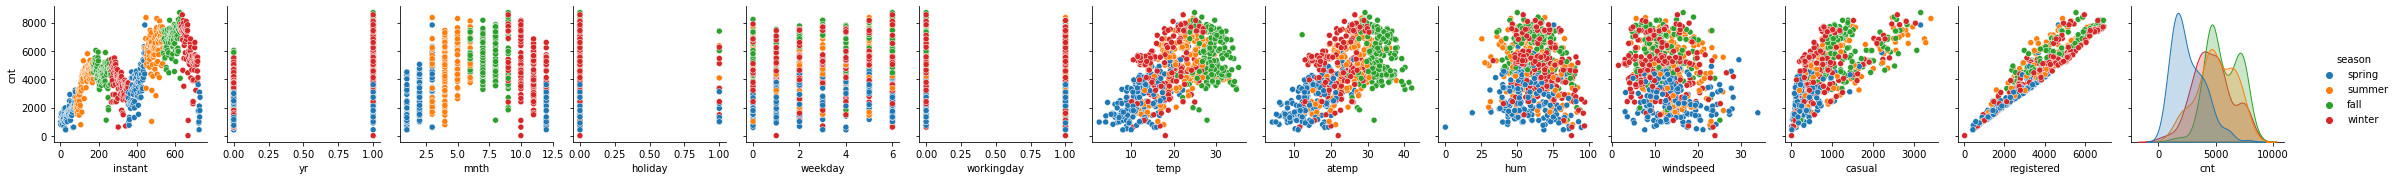

In [377]:
plt.figure(figsize=(16, 6))
sns.pairplot(db,y_vars='cnt',hue='season')


<AxesSubplot:>

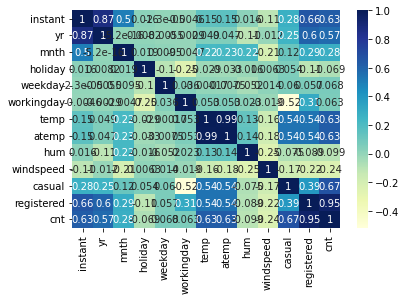

In [378]:
sns.heatmap(db.corr(),cmap="YlGnBu",  annot = True)

<AxesSubplot:xlabel='instant', ylabel='cnt'>

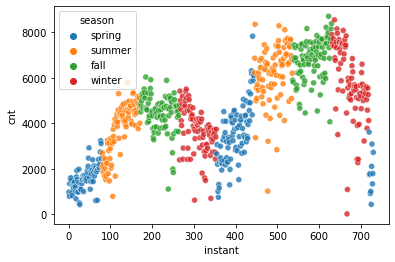

In [379]:
sns.scatterplot(data=db,x='instant',y='cnt',hue='season',alpha=0.8)

<AxesSubplot:xlabel='instant', ylabel='cnt'>

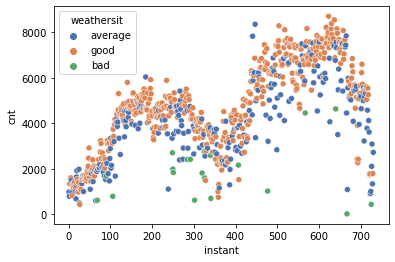

In [380]:
sns.scatterplot(data=db,x='instant',y='cnt',hue='weathersit',palette="deep")

+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [381]:
db.weathersit.value_counts()

good       463
average    246
bad         21
Name: weathersit, dtype: int64

What happens during spring season?
Image result for spring season characteristics
Spring is a time when flowers bloom and trees begin to grow and reproduce. The days grow longer and the temperature in most areas become more temperate.

###### Observations from pair plot

- Almost linear relationship with count, indicating that the sales are increasing over time linearly
- Sales relatively low in Spring
- Sales relatively lowin  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- Looks like sales increase as the temperature does, 
- Poor sales on days with low humidity

###### Use pd.get_dummies() to deal with categorical data

In [382]:
season=pd.get_dummies(db['season'],drop_first=True)
weathersit = pd.get_dummies(db['weathersit'],drop_first=True)

In [383]:
db=pd.concat([db,season],axis=1)
db=pd.concat([db,weathersit],axis=1)
db=db.drop(['season','weathersit','dteday'],axis=1)

###### Using MinMax Scalar to scale numerical values and OrdinalEncoder for weekofday

In [384]:
scalar = MinMaxScaler()
numerical_columns=['instant','mnth','temp','atemp','hum','windspeed','casual','registered','cnt']
scalar.fit(db[numerical_columns])
db[numerical_columns] = scalar.transform(db[numerical_columns])
db

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,bad,good
0,0.000000,0,0.0,0,6,0,0.355170,0.373517,0.828620,0.284606,0.096538,0.091539,0.110792,1,0,0,0,0
1,0.001372,0,0.0,0,0,0,0.379232,0.360541,0.715771,0.466215,0.037852,0.093849,0.089623,1,0,0,0,0
2,0.002743,0,0.0,0,1,1,0.171000,0.144830,0.449638,0.465740,0.034624,0.174560,0.152669,1,0,0,0,1
3,0.004115,0,0.0,0,2,1,0.175530,0.174649,0.607131,0.284297,0.031103,0.207046,0.177174,1,0,0,0,1
4,0.005487,0,0.0,0,3,1,0.209120,0.197158,0.449313,0.339143,0.023474,0.216286,0.181546,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.994513,1,1.0,0,4,1,0.243025,0.193709,0.671380,0.675656,0.071890,0.266676,0.240681,1,0,0,0,0
726,0.995885,1,1.0,0,5,1,0.241986,0.230993,0.606684,0.274350,0.188380,0.350996,0.353543,1,0,0,0,0
727,0.997257,1,1.0,0,6,0,0.241986,0.214393,0.774208,0.210260,0.046068,0.167774,0.151749,1,0,0,0,0
728,0.998628,1,1.0,0,0,0,0.245101,0.200348,0.497001,0.676936,0.106221,0.203869,0.204096,1,0,0,0,1


###### Building a Base Model with all the available features

###### Split data into test and train set

In [385]:
train , test =train_test_split(db,train_size=0.6,random_state=100)

In [386]:
x_train = train.drop(['cnt'],axis=1)
y_train = train['cnt']

In [387]:
x_test = test.drop(['cnt'],axis=1)
y_test = test['cnt']

In [388]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

All the info of date is extracted into features , so we can drop date column

In [389]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [390]:
y_test_pred = linear_model.predict(x_test)

In [391]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
285    0.332605
560    0.691325
610    0.691671
334    0.426254
594    0.902324
Name: cnt, Length: 292, dtype: float64

In [392]:
y_test_pred

array([0.69270594, 0.71203405, 0.30338242, 0.54739991, 0.56902899,
       0.438104  , 0.51035435, 0.55372757, 0.69270594, 0.49585826,
       0.77220433, 0.79924068, 0.45121951, 0.73354809, 0.29590428,
       0.78934653, 0.54878049, 0.17441325, 0.62965946, 0.62551772,
       0.88483663, 0.27300966, 0.74942476, 0.21916705, 0.46433502,
       0.49942476, 0.86079153, 0.5750115 , 0.90715601, 0.46755637,
       0.79176254, 0.84410953, 0.54912563, 0.46606075, 0.18235159,
       0.46606075, 0.43292683, 0.74942476, 0.22583985, 0.52312471,
       0.51622181, 0.33421537, 0.65301427, 0.37540267, 0.58444547,
       0.85549931, 0.23400828, 0.47146802, 0.60941095, 0.27991256,
       0.87931431, 0.54855039, 0.57984353, 0.95167971, 0.15174873,
       0.7154855 , 0.43304188, 0.57225035, 0.30924988, 0.64507593,
       0.47710538, 0.43281178, 0.1983433 , 0.52508053, 0.62770364,
       0.53014266, 0.93580304, 0.65163369, 0.52611597, 0.94397147,
       0.16670502, 0.54567418, 0.87091578, 0.78635527, 0.44788

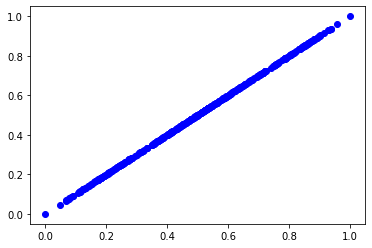

In [393]:
y_train_pred = linear_model.predict(x_train)
plt.scatter(y_train,y_train_pred,color='b')

In [394]:
linear_model.score(x_test,y_test)

1.0

###### Model looks excellant!! Lets calcute the r2 score Might be a case of overfitting

In [395]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

-1.072840322354787

###### Running RFE to extract 10 important features

In [396]:
from sklearn.feature_selection import RFE
rfe = RFE(linear_model, 10)     
rfe = rfe.fit(x_train, y_train)

In [397]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('instant', True, 1),
 ('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', False, 5),
 ('windspeed', False, 7),
 ('casual', True, 1),
 ('registered', True, 1),
 ('spring', False, 4),
 ('summer', True, 1),
 ('winter', False, 3),
 ('bad', True, 1),
 ('good', False, 8)]

In [398]:
x_train.columns[rfe.support_]

Index(['instant', 'yr', 'mnth', 'holiday', 'weekday', 'temp', 'casual',
       'registered', 'summer', 'bad'],
      dtype='object')

In [399]:
import statsmodels.api as sm  
x_train_stats = sm.add_constant(x_train)

In [400]:
lm = sm.OLS(y_train,x_train_stats).fit()
x_test_stats = sm.add_constant(x_test)
y_pred_stats = lm.predict(x_test_stats) 

In [401]:
r2_score(y_test,y_pred_stats)

1.0

In [402]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.274e+29
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:48:56   Log-Likelihood:                 14001.
No. Observations:                 438   AIC:                        -2.797e+04
Df Residuals:                     420   BIC:                        -2.789e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.608e-16   1.65e-15     -0.219      0.8

###### Looks like our model is a perfect fit !! Lets remove the redundant variables and build again

In [403]:
x_train_rfe =x_train[x_train.columns[rfe.support_]]
x_test_rfe =x_test[x_test.columns[rfe.support_]]

###### Calculating VRF values to eliminate co - linearity

In [406]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,instant,1774.49
1,yr,680.41
2,mnth,419.19
7,registered,22.19
5,temp,13.55
6,casual,4.06
4,weekday,2.73
8,summer,1.57
9,bad,1.24
3,holiday,1.04


###### Removing Instant and calculating VIF again

In [407]:
x_train_rfe = x_train_rfe.drop(['instant'],axis=1)

In [408]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,registered,22.13
4,temp,13.22
1,mnth,4.66
0,yr,4.53
5,casual,4.03
3,weekday,2.61
7,summer,1.57
8,bad,1.23
2,holiday,1.03


###### Removing registred now , as it is defnitely co- linear with cnt

In [409]:
x_train_rfe = x_train_rfe.drop(['registered'],axis=1)

In [410]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,7.18
5,casual,3.94
1,mnth,3.69
3,weekday,2.53
0,yr,1.95
6,summer,1.51
7,bad,1.08
2,holiday,1.02


###### VIF values look good now, let us build the model again now and calculate r square

In [417]:
x_train_latest = x_train[x_train_rfe.columns]
#x_test_latest - x_test[x_train_rfe.columns]
x_test

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,spring,summer,winter,bad,good
184,0.252401,0,0.545455,1,1,0,0.831783,0.769660,0.655956,0.121812,0.898768,0.427086,0,0,0,0,0
535,0.733882,1,0.454545,0,3,1,0.901354,0.842587,0.608826,0.188468,0.255282,0.767976,0,1,0,0,1
299,0.410151,0,0.818182,0,4,1,0.511964,0.496145,0.835904,0.361537,0.069836,0.346376,0,0,1,0,0
221,0.303155,0,0.636364,0,3,1,0.881625,0.795343,0.436161,0.366681,0.258803,0.559630,0,0,0,0,1
152,0.208505,0,0.454545,0,4,1,0.817246,0.741471,0.313625,0.556403,0.215376,0.608143,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.390947,0,0.818182,0,4,1,0.660452,0.620528,0.922023,0.246140,0.084507,0.375830,0,0,1,0,0
560,0.768176,1,0.545455,0,0,0,0.855665,0.821875,0.738218,0.297431,0.562793,0.590673,0,0,0,0,1
610,0.836763,1,0.727273,1,1,0,0.807900,0.764688,0.813196,0.265382,0.575998,0.584609,0,0,0,0,1
334,0.458162,0,1.000000,0,4,1,0.315711,0.297291,0.539417,0.407706,0.052817,0.508952,0,0,1,0,1


In [448]:
x_train_rfe_stats = sm.add_constant(x_train_latest)
lm3 = sm.OLS(y_train,x_train_rfe_stats).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     258.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          6.37e-159
Time:                        23:11:38   Log-Likelihood:                 412.52
No. Observations:                 438   AIC:                            -807.0
Df Residuals:                     429   BIC:                            -770.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0425      0.015      2.773      0.0

###### Verifying the same with Linear Model

In [447]:
l= linear_model.fit(x_train_latest,y_train)
l.score(x_train_rfe,y_train)

0.8283706243785229

In [451]:
x_test_latest = x_test[x_test_latest.columns]
x_test_latest.shape

(292, 8)

In [452]:
x_test_latest_stats= sm.add_constant(x_test_latest)
lm4= sm.OLS(y_test,x_test_latest_stats).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     121.4
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           7.44e-87
Time:                        23:12:50   Log-Likelihood:                 255.16
No. Observations:                 292   AIC:                            -492.3
Df Residuals:                     283   BIC:                            -459.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0427      0.022      1.935      0.0

###### Difference betweeen Test r square and train r square is around 5 percent, hence the model is a good fit

### Residual Analysis of the train data

<AxesSubplot:xlabel='cnt', ylabel='Density'>

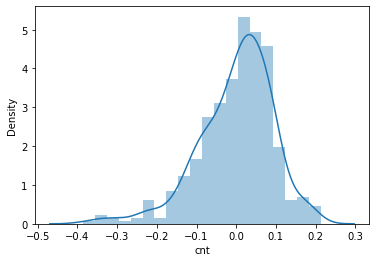

In [457]:
y_train_pred = l.predict(x_train_latest)
sns.distplot((y_train - y_train_pred), bins = 20)

###### Error is normally distributed !

### Model Evaluation

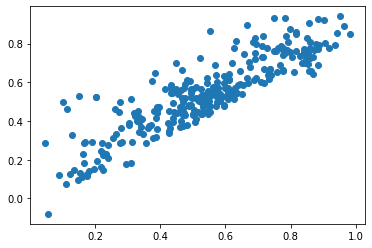

In [458]:
y_test_pred = l.predict(x_test_latest)
plt.scatter(y_test,y_test_pred)

In [459]:
l.coef_

array([ 0.21289875,  0.14333642, -0.09460832,  0.00455978,  0.37095832,
        0.31618259,  0.04045514, -0.21246194])

In [460]:
x_train_latest.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'temp', 'casual', 'summer', 'bad'], dtype='object')

In [462]:
l.intercept_

0.042501777651181794

# The Linear equation of the model is 
Count = 0.21289875 * year + 0.14333642 * month - 0.09460832 * holiday + 0.00455978 *weekday + 0.37095832 * temp + 0.31618259 *casual+ 
0.04045514 * summer  - 0.21246194 * bad  + 0.042501777651181794

#### - Bad weather and Holiday have negative impact on sales, otherwise the sales is looking to improve every year with time